#### 2.1 Implementing the Linear Algebra

In [1]:
import numpy as np

#### 2.2 reshape Operation

The reshape operation is a very common operation in the NumPy operation library, which is used to change the number of dimensions of a tensor and the size of each dimension. For example, a 10x10 picture is directly saved as a sequence including 100 elements, and when the information is read, reshape converts it from 1x100 to 10x10. The following is an example:

In [2]:
x = np.arange(1,21)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [3]:
x.shape

(20,)

Convert x into a two-dimensional matrix whose first dimension is 1.

In [4]:
x = x.reshape(1,20)

In [5]:
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]])

In [6]:
x = x.reshape(5,4)

In [7]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

#### 2.3 Implementing Transposition

Vector and matrix transposition is to exchange the row and column order, while that of the tensor in three dimensions and above requires you to specify the dimension for transposition.

In [8]:
A = np.arange(25).reshape(5,5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [9]:
A.T

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

2.4 Implementing Matrix Multiplication

Matrix multiplication: Two matrices are denoted as A and B respectively and only when the column quantity of matrix A is equal to the row quantity of matrix B can the two matrices be multiplied 

In [10]:
A = np.arange(1,9).reshape(4,2)
B = np.arange(1,13).reshape(2,6)

In [11]:
A

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [12]:
B

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [13]:
np.matmul(A,B)

array([[ 15,  18,  21,  24,  27,  30],
       [ 31,  38,  45,  52,  59,  66],
       [ 47,  58,  69,  80,  91, 102],
       [ 63,  78,  93, 108, 123, 138]])

#### 2.5 Matrix Operations

Element operations cover operations on matrices of the same shapes, such as multiplication, addition on corresponding elements, that is, performing addition, subtraction, multiplication, and division on corresponding elements in two matrices.

In [14]:
A = np.arange(6).reshape(3,2)

In [15]:
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [16]:
A*A

array([[ 0,  1],
       [ 4,  9],
       [16, 25]])

In [17]:
A+A

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [18]:
A-A

array([[0, 0],
       [0, 0],
       [0, 0]])

2.6 Implementing an Invertible Matrix

In [19]:
A = np.arange(4).reshape(2,2)

In [20]:
A

array([[0, 1],
       [2, 3]])

In [21]:
np.linalg.inv(A)

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

2.7 Eigenvalues and Eigenvectors

Compute the eigenvalue and eigenvector of a matrix and visualize them.

In [22]:
from scipy.linalg import eig
import numpy as np
import matplotlib.pyplot as plt

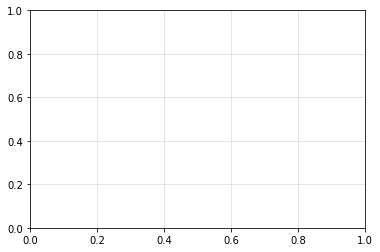

In [23]:
A =[[1,2],[2,1]]
evals, evecs = eig(A)
evecs = evecs[:,0],evecs[:,1]
fig,ax = plt.subplots()
for spine in ['left','bottom']:
  ax.spines[spine].set_position('zero')
ax.grid(alpha=0.4)

Draw the eigenvector. annotate refers to the action pointing an arrow to a place and then adding notes to the place. s indicates the input content, xy indicates the direction the arrow points to, xytext indicates the location of the text; arrowprops uses arrowstyle to indicate the style or type of the arrow.

In [25]:
xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
for v in evecs:
    ax.annotate(s="", xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))


In [32]:
x = np.linspace(xmin, xmax, 3)# Return numbers with even intervals within the specified interval.
for v in evecs:
    a = v[1] / v[0] # Unit vector in the eigenvector direction
    ax.plot (x, a * x,'r-', lw=0.4) # lw indicates the line thickness.
plt.show()  


In [33]:
fig.savefig('my_figure.png')

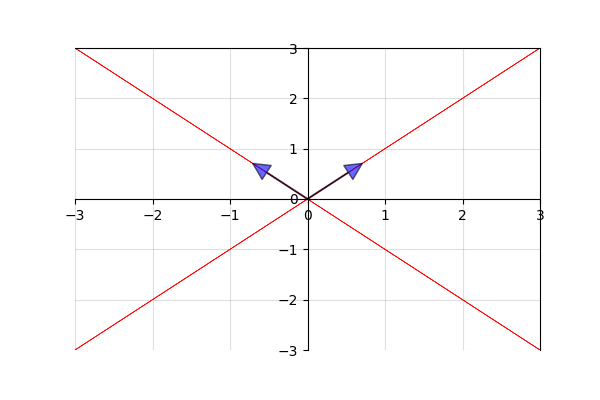

In [34]:
from IPython.display import Image
Image('my_figure.png')

Notes: The normal vector of the blue arrow is an eigenvector, and the space formed by two red lines is an eigenspace.

#### 2.8 Computing the Determinant

This section describes how to compute the determinant of a matrix.

In [38]:
E = [[1, 2, 3],
      [4, 5, 6],
      [7, 8, 9]]
np.linalg.det(E)

0.0

2.9 Implementing the Singular Value Decomposition

We can classify articles according to their titles using the singular value decomposition.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
words = ["books","dad","stock","value","singular","estate","decomposition"]

Assume that there are eight titles and seven keywords. Record the number of times each keyword appears in each title, and obtain the matrix X. In the matrix X, each row indicates a title, each column indicates a keyword, and each element in the matrix indicates the number of times of a title appears in a keyword.

In [42]:
X=np.array([[0,2,1,0,0,0,0],[2,0,0,1,0,1,0],[1,0,0,0,0,0,1],[0,0,1,0,0,0,0],[0,1,0,0,0,0,0],[0,0,0,1,1,0,1],[0,1,0,0,1,0,0],[0,0,0,0,1,1,1]])
U,s,Vh=np.linalg.svd(X)

In [43]:
print("U=",U)

U= [[-1.87135757e-01 -7.93624528e-01  2.45011855e-01 -2.05404352e-01
  -2.57278434e-15 -4.99600361e-16 -2.57394431e-01 -4.08248290e-01]
 [-6.92896814e-01  2.88368077e-01  5.67788037e-01  2.22142537e-01
   2.70706957e-15  2.54000254e-01 -2.21623012e-02  0.00000000e+00]
 [-3.53233681e-01  1.22606651e-01  3.49203461e-02 -4.51735990e-01
  -5.41413914e-15 -7.62000762e-01  2.72513448e-01  1.11022302e-16]
 [-2.61369658e-02 -1.33189110e-01  7.51079037e-02 -6.44727454e-01
  -8.60422844e-15  5.08000508e-01  3.68146235e-01  4.08248290e-01]
 [-8.04993957e-02 -3.30217709e-01  8.49519758e-02  2.19661551e-01
   2.99326088e-15 -2.54000254e-01 -3.12770333e-01  8.16496581e-01]
 [-3.95029694e-01  1.56123876e-02 -5.28290830e-01 -6.82340484e-02
  -7.07106781e-01  1.27000127e-01 -2.09360158e-01 -2.77555756e-17]
 [-2.02089013e-01 -3.80395849e-01 -2.12899198e-01  4.80790894e-01
   6.03971280e-15  5.55111512e-16  7.33466480e-01  8.32667268e-17]
 [-3.95029694e-01  1.56123876e-02 -5.28290830e-01 -6.82340484e-02


In [44]:
s

array([2.85653844, 2.63792139, 2.06449303, 1.14829917, 1.        ,
       1.        , 0.54848559])

In [46]:
Vh

array([[-6.08788345e-01, -2.29949618e-01, -7.46612474e-02,
        -3.80854846e-01, -3.47325416e-01, -3.80854846e-01,
        -4.00237243e-01],
       [ 2.65111314e-01, -8.71088358e-01, -3.51342402e-01,
         1.15234846e-01, -1.32365989e-01,  1.15234846e-01,
         5.83153945e-02],
       [ 5.66965547e-01,  1.75382762e-01,  1.55059743e-01,
         1.91316736e-02, -6.14911671e-01,  1.91316736e-02,
        -4.94872736e-01],
       [-6.48865369e-03,  2.52237176e-01, -7.40339999e-01,
         1.34031699e-01,  2.99854608e-01,  1.34031699e-01,
        -5.12239408e-01],
       [ 0.00000000e+00,  3.83873092e-15, -1.10520600e-14,
        -7.07106781e-01,  4.11911265e-15,  7.07106781e-01,
        -7.08286339e-15],
       [-2.54000254e-01, -2.54000254e-01,  5.08000508e-01,
         3.81000381e-01,  2.54000254e-01,  3.81000381e-01,
        -5.08000508e-01],
       [ 4.16034348e-01, -1.71550021e-01,  2.01922906e-01,
        -4.22112199e-01,  5.73845817e-01, -4.22112199e-01,
        -2.6656464

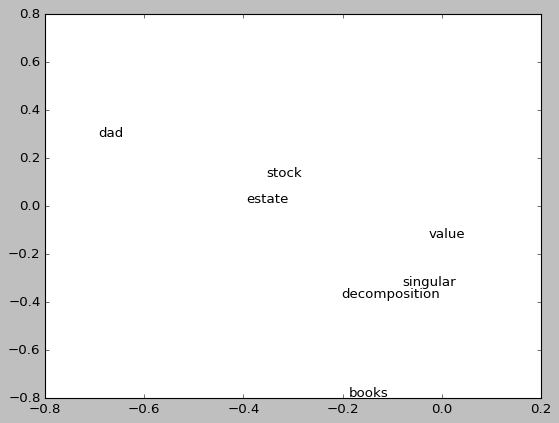

In [52]:
plt.axis([-.8,0.2,-0.8,0.8])
for i in range(len(words)):
    plt.text(U[i,0],U[i,1],words[i])
plt.show()


2.10 Solving a System of Linear Equations
Only the SciPy.linalg.solve function is used to solve a system of linear equations.
Take the department monthly running cases in the matrix section in the PPT as an example. The system of linear equations is as follows:
* 10x_1 + 8x_2 + 12x_3 = 20
* 4x_1 + 4x_2 + 2x_3 = 8
* 2x_1 - 4x_2- 2x_3 = -5




In [53]:
from scipy.linalg import solve
a = np.array([[10, 8, 12], [4, 4, 2], [2, -4, -2]])
b = np.array([10,8,-5])
x = solve(a, b)
print(x)

[ 0.5     1.9375 -0.875 ]
